# Angler tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from angler import Simulation
from datasets.generators1d import * 
np.set_printoptions(precision=3)

In [2]:
DEVICE_LENGTH = 256
CAVITY_BUFFER = 0
BUFFER_PERMITTIVITY = -1e10
NPML = 32
DL = 0.02
L0 = 1e-6
MODE = "Ez"

In [3]:
OMEGA = 1.215e15
MU0 = 4 * np.pi * 10**-7
EPSILON0 =  8.854187817620e-12 
SCALE = 1e-15
C = 299792458.0
L0 = 1e-6
PIXEL_SIZE = 0.05 * L0
wavelength = 2 * np.pi * C / OMEGA

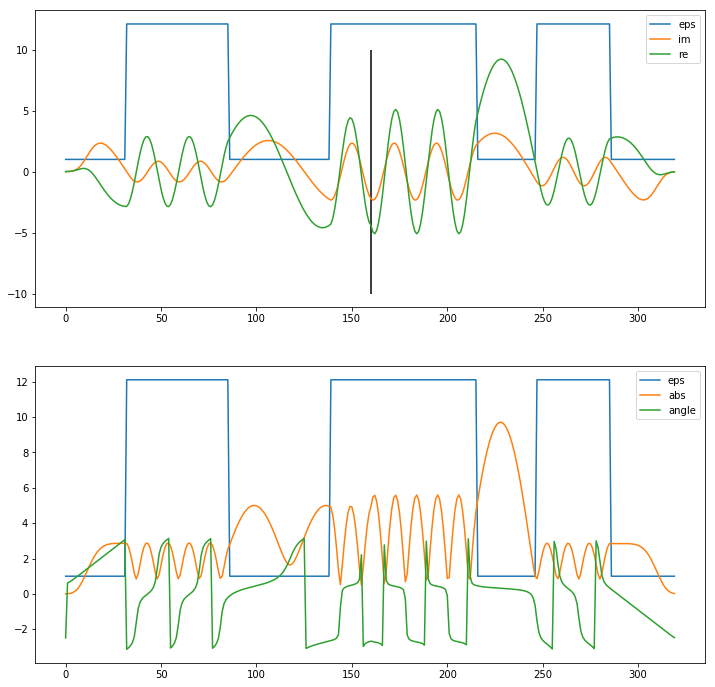

In [6]:
epsilons = perm_alternating_layers(s=DEVICE_LENGTH, eps1=)
# epsilons = np.ones(DEVICE_LENGTH)
# epsilons[150:] = 3

total_length = DEVICE_LENGTH + 2 * CAVITY_BUFFER + 2 * NPML
start = NPML + CAVITY_BUFFER
end = start + DEVICE_LENGTH

# need to use two rows to avoid issues with fd-derivative operators
# perms = np.ones((2, total_length), dtype=np.float64)
perms = np.ones((1, total_length), dtype=np.float64)


# set permittivity and reflection zone
# perms[:, :start] = BUFFER_PERMITTIVITY
perms[:, start:end] = epsilons
# perms[:, end:] = BUFFER_PERMITTIVITY

# perms[:start] = BUFFER_PERMITTIVITY
# perms[start:end] = np.reshape(epsilons, (end-start, 1))
# perms[end:] = BUFFER_PERMITTIVITY

src_x = int(DEVICE_LENGTH / 2) + NPML + CAVITY_BUFFER

sim = Simulation(OMEGA, perms, DL, [0, NPML], MODE, L0=L0)

sim.src[:, src_x] = 1j
# sim.src[src_x + NPML + CAVITY_BUFFER, :] = 1j


clip0 = NPML + CAVITY_BUFFER
clip1 = -(NPML + CAVITY_BUFFER)

Hx, Hy, Ez = sim.solve_fields()
# perms = perms[:, clip0:clip1]
# Hx = Hx[:, clip0:clip1]
# Hy = Hy[:, clip0:clip1]
# Ez = Ez[:, clip0:clip1]

fix, ax = plt.subplots(2,1, figsize = (12,12))
ax[0].plot(perms[0], label="eps")
ax[0].plot(np.imag(Ez[0]), label="im")
ax[0].plot(np.real(Ez[0]), label="re")
ax[0].vlines(src_x, -10,10)
ax[0].legend()

ax[1].plot(perms[0], label="eps")
ax[1].plot(np.abs(Ez[0]), label="abs")
# ax[1].plot(np.angle(Ez[0])+DL*np.abs(np.arange(-total_length//2, total_length//2)), label="angle")
ax[1].plot(np.angle(Ez[0]), label="angle")
ax[1].legend()
plt.show()

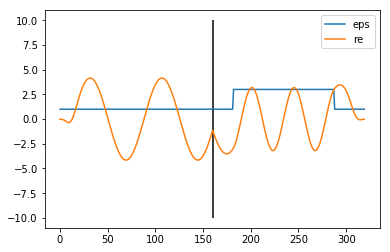

In [104]:
plt.plot(perms[0], label="eps")
plt.plot(np.real(Ez[0]), label="re")
plt.vlines(src_x, -10,10)
plt.legend()
plt.show()

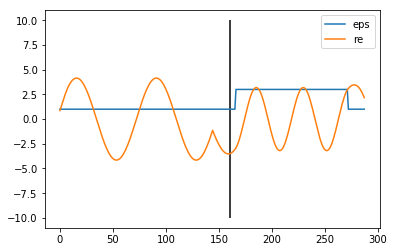

In [105]:
plt.plot(perms[0, 16:-16], label="eps")
# plt.plot(np.imag(Ez[0]), label="im")
plt.plot(np.real(Ez[0, 16:-16]), label="re")
plt.vlines(src_x, -10,10)
# plt.plot(np.abs(Ez[0]), label="abs")
# plt.plot(np.angle(Ez[0]), label="angle")
plt.legend()
plt.show()

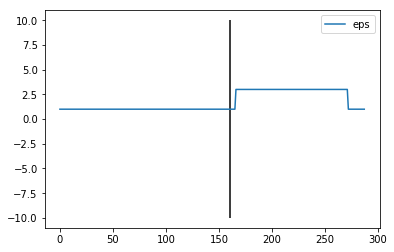

In [106]:
plt.plot(perms[0, 16:-16], label="eps")
# plt.plot(np.imag(Ez[0]), label="im")
# plt.plot(np.real(Ez[0, 16:-16]), label="re")
plt.vlines(src_x, -10,10)
# plt.plot(np.abs(Ez[0]), label="abs")
# plt.plot(np.angle(Ez[0]), label="angle")
plt.legend()
plt.show()

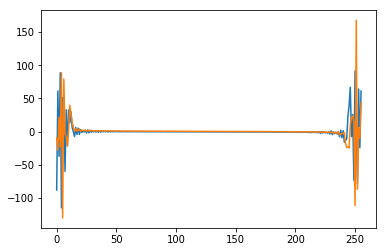

In [16]:
fft = np.fft.fft(Ez[0][32:-32])
plt.plot(np.real(fft))
plt.plot(np.imag(fft))
# plt.plot(np.fft.ifft(fft))
# plt.plot(perms[0], label="eps")

plt.show()

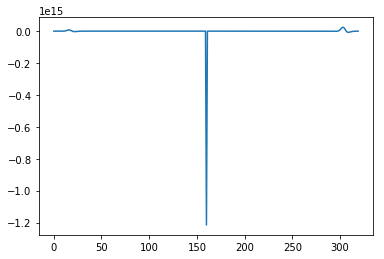

In [8]:
A = sim.A.todense()
curl=np.real(np.asarray(A @ np.real(Ez).flatten()))[0]
plt.plot(curl)
plt.show()

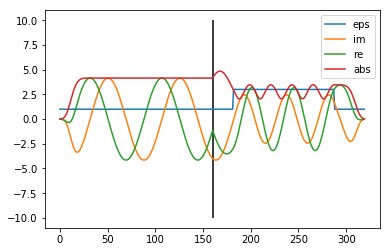

In [110]:
plt.plot(perms[0], label="eps")
plt.plot(np.imag(Ez[0]), label="im")
plt.plot(np.real(Ez[0]), label="re")
plt.vlines(src_x, -10,10)
plt.plot(np.abs(Ez[0]), label="abs")
# plt.plot(np.angle(Ez[0]), label="angle")
plt.legend()
plt.show()

In [63]:
from angler import Simulation
import numpy as np
import scipy

omega = 2*np.pi*2e14
eps_r = np.ones((8,1))
eps_r[:2] = -1e19
eps_r[-2:] = -1e19
S = Simulation(omega, eps_r, 0.01, [0, 0], 'Ez')
A = S.A.todense()
null = scipy.linalg.null_space(A).T

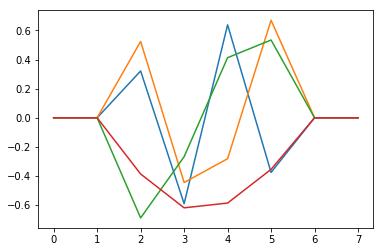

In [64]:
freqs = [np.fft.fft(n[2:-2]) for n in null]
# [plt.plot(np.real(freq)) for freq in freqs]
[plt.plot(np.real(n)) for n in null]
plt.show()

(200,)